<a href="https://colab.research.google.com/github/Will-be-big-man/Genetic-Algorithm-GA-_base_DL/blob/main/Made_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving hinji_0318.csv to hinji_0318.csv


Wrokflow
1. 부모 초기화
2. 평가
3. 선택
4. Crossover
5. Mutation

만약 원하는 결과가 아니라면 2 ~ 5 다시 진행

적합도 = 예측값, 예측값은 파라핀 분포의 비율이기 때문에 목표로 하는 값이 95% 라면 현재 알고리즘은 빈공간을 촬영한 것이기 때문에 5가 나와야함

In [7]:
import datetime
import random
import unittest
import copy
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from keras import models, optimizers, layers, regularizers
from keras.layers.normalization import layer_normalization
from keras.callbacks import EarlyStopping
from keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf 
from pandas import DataFrame as df
from sklearn.metrics import mean_squared_error
import random
import torch
dataset = pd.read_csv('/content/hinji_0318.csv', header = 1)
dataset = shuffle(dataset)
dataset = dataset.values
dataset = dataset.astype(float)

train_p = 0.6

#예시
len_data = dataset.shape[0]
x_train = dataset[: int(len_data * train_p) , :5 ]
y_train = dataset[: int(len_data * train_p) , [5] ]
x_test = dataset[ int(len_data *train_p) :  , :5 ]
y_test = dataset[ int(len_data * train_p) :  , [5]  ]

print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

def make_parent(lenght, low, high): #랜덤으로 chromosome_list를 만든다 (범위는 지정함)
  chromosome_list = []
  for i in range(lenght):
    a = random.randrange(low,high)
    b = random.randrange(1,10)
    c = (str(a)+"."+str(b))
    chromosome_list.append(float(c))
  return chromosome_list

def make_model(node_list,lenght): # 딥러닝 모델을 만듬 
  parameters = lenght
  model =  models.Sequential()
  for i in range(len(node_list)):
    if i == 0:
      model.add(layers.Dense(node_list[i], activation='elu', kernel_regularizer=regularizers.l1_l2(0.0001),input_shape=(parameters,)))
    else :
      model.add(layers.Dense(node_list[i], activation='elu'))
  model.add(layers.Dense(1))
  adam = tf.optimizers.Adam(lr=0.04, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.002)
  model.compile(optimizer = 'adam' , loss = 'mse', metrics=[tf.keras.metrics.MeanAbsoluteError()])
  return model

def train_model(model, x_train, y_train, x_test, y_test, early, epochs, batch_size): #rmse, 적합도 = 예측 (예측이 높을수록 빈공간이 적음)
  early_stopping = EarlyStopping(patience=early)
  history = model.fit(x_train, y_train ,epochs=epochs, batch_size=batch_size, verbose=1 ,
                    validation_data = (x_test, y_test) ,callbacks = [early_stopping])

  predictions = model.predict(x_test)
  plt.plot(predictions, y_test, 'ro')

  plt.xlabel('prediction')
  plt.ylabel('y_test')
  plt.show()
  rmse = np.sqrt(mean_squared_error(y_test, predictions))
  return model, rmse

def generate_child(model, chromosome_list, minor): # 정확도에 따라서 구분함
  aa = chromosome_list
  c = []
  c.append(aa)
  chromosome_list = c
  ori_pre = model.predict(c) #원래 오차
  last_chromosome_list = []
  for i in range(len(aa)):
    #ori_pre = model.predict(chromosome_list) #원래 오차
    #revision = random.randrange(0,len(chromosome_list)) #기존의 부모
    re_chromosome_list = chromosome_list # re_부모 = 기존의 부모로 저장
    re_chromosome_list[0][i] =  re_chromosome_list[0][i] + 2 # 랜덤으로 얻어진 값을 minor(지정해준 값) 으로 더함
    re_pre = model.predict(re_chromosome_list) # re_부모로 예측
    if ori_pre <= re_pre : # 만약re가 더 좋으면
      last_chromosome_list.append(re_chromosome_list[0][i]) # 최종 부모 = re로 수정
    else :
      last_chromosome_list.append(aa[i]) # 만약 아니면 최종 부모 = 그대로
  return last_chromosome_list

def selection(p1, p2): #자름선 교차
  p3 = p1[0:3] + p2[3:]
  return p3

def muatation(p3, score = 1): # 1%의 확률로 변이 진행
  mut = []
  random_s = random.randrange(0,100)
  for i in range(len(p3)):
    mut.append(i * score)
  for j in range(len(p3)):
    if random_s == mut[j]:
      r = random.randrange(0,5)
      h = random.randrange(0,10)
      change = str(r) + "." + str(h)
      p3[random_s] = p3[random_s] - float(change)
  return p3

def replacement(p3, model, goal = 5): # 예측이 goal 보다 높으면 그때의 값 출력후 끝
  p33 = []
  p33.append(p3)
  last_fitness = model.predict(p33)
  print(last_fitness)
  if last_fitness < goal:
    ans = 0
  else :
    ans = 1
    print(p33)
  return ans,p33

(136, 5) (136, 1)
(92, 5) (92, 1)


[73.9, 75.6, 35.2, 2.3, 36.6]
Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 1s 33ms/step - loss: 159.6395 - mean_absolute_error: 10.8437 - val_loss: 152.1577 - val_mean_absolute_error: 11.1968
Epoch 2/500
7/7 [==============================] - 0s 6ms/step - loss: 122.6668 - mean_absolute_error: 9.4203 - val_loss: 119.0993 - val_mean_absolute_error: 9.8370
Epoch 3/500
7/7 [==============================] - 0s 9ms/step - loss: 94.9876 - mean_absolute_error: 8.2620 - val_loss: 92.8886 - val_mean_absolute_error: 8.6043
Epoch 4/500
7/7 [==============================] - 0s 7ms/step - loss: 73.6270 - mean_absolute_error: 7.2441 - val_loss: 73.7725 - val_mean_absolute_error: 7.5597
Epoch 5/500
7/7 [==============================] - 0s 7ms/step - loss: 59.1665 - mean_absolute_error: 6.4734 - val_loss: 60.4697 - val_mean_absolute_error: 6.7401
Epoch 6/500
7/7 [==============================] - 0s 9ms/step - loss: 48.8084 - mean_absolute_error: 5.8645 - val_loss: 50.7682 - val_mean_absolute_error: 6.1102
Epoch 7/500
7/7 [==========

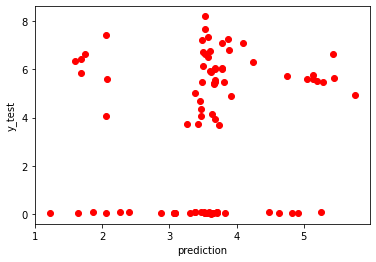

[75.9, 77.6, 37.2, 4.3, 38.6]
[75.9, 77.6, 37.2, 4.3, 38.6]
[37.3, 45.1, 70.8, 60.7, 47.3]
[37.3, 45.1, 70.8, 60.7, 47.3]
[75.9, 77.6, 37.2, 60.7, 47.3]
[75.9, 77.6, 37.2, 60.7, 47.3]
[[9.910863]]
[[75.9, 77.6, 37.2, 60.7, 47.3]]
[[10.287348]]
[[77.9, 79.6, 39.2, 62.7, 49.3]]
[[10.663834]]
[[79.9, 81.6, 41.2, 64.7, 51.3]]
[[11.0403185]]
[[81.9, 83.6, 43.2, 66.7, 53.3]]
[[11.416804]]
[[83.9, 85.6, 45.2, 68.7, 55.3]]
[[11.79329]]
[[85.9, 87.6, 47.2, 70.7, 57.3]]
[[12.169773]]
[[87.9, 89.6, 49.2, 72.7, 59.3]]
[[12.546258]]
[[89.9, 91.6, 51.2, 74.7, 61.3]]
[[12.922744]]
[[91.9, 93.6, 53.2, 76.7, 63.3]]
[[13.299229]]
[[93.9, 95.6, 55.2, 78.7, 65.3]]
[[13.675715]]
[[95.9, 97.6, 57.2, 80.7, 67.3]]
[[14.0522]]
[[97.9, 99.6, 59.2, 82.7, 69.3]]
[[14.428685]]
[[99.9, 101.6, 61.2, 84.7, 71.3]]
[[14.805172]]
[[101.9, 103.6, 63.2, 86.7, 73.3]]
[[15.181655]]
[[103.9, 105.6, 65.2, 88.7, 75.3]]
[[15.558143]]
[[105.9, 107.6, 67.2, 90.7, 77.3]]
[[15.934627]]
[[107.9, 109.6, 69.2, 92.7, 79.3]]
[[16.311115

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 1s 37ms/step - loss: 19.1614 - mean_absolute_error: 3.6298 - val_loss: 15.8167 - val_mean_absolute_error: 3.1679
Epoch 2/500
7/7 [==============================] - 0s 6ms/step - loss: 18.7394 - mean_absolute_error: 3.6095 - val_loss: 15.5208 - val_mean_absolute_error: 3.1597
Epoch 3/500
7/7 [==============================] - 0s 6ms/step - loss: 18.3982 - mean_absolute_error: 3.5932 - val_loss: 15.2793 - val_mean_absolute_error: 3.1527
Epoch 4/500
7/7 [==============================] - 0s 9ms/step - loss: 18.1036 - mean_absolute_error: 3.5779 - val_loss: 15.0860 - val_mean_absolute_error: 3.1468
Epoch 5/500
7/7 [==============================] - 0s 9ms/step - loss: 17.8735 - mean_absolute_error: 3.5660 - val_loss: 14.9260 - val_mean_absolute_error: 3.1416
Epoch 6/500
7/7 [==============================] - 0s 10ms/step - loss: 17.6822 - mean_absolute_error: 3.5568 - val_loss: 14.7902 - val_mean_absolute_error: 3.1386
Epoch 7/500
7/7 [===============

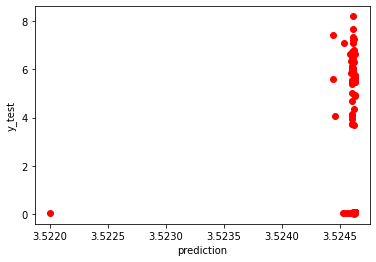

[21.3, 40.5, 72.4, 64.2, 57.8]
[21.3, 40.5, 72.4, 64.2, 57.8]
[53.8, 25.7, 12.7, 76.5, 18.7]
[53.8, 25.7, 12.7, 76.5, 18.7]
[21.3, 40.5, 72.4, 76.5, 18.7]
[21.3, 40.5, 72.4, 76.5, 18.7]
[[0.66825706]]
[[0.96458405]]
[[1.4437]]
[[2.00915]]
[[2.428668]]
[[2.5949006]]
[[2.6839094]]
[[3.0001435]]
[[3.145259]]
[[3.2502139]]
[[3.326128]]
[[3.3810382]]
[[3.4207568]]
[[3.4494886]]
[[3.4702716]]
[[3.4853063]]
[[3.496182]]
[[3.5040498]]
[[3.5097413]]
[[3.5138583]]
[[3.5168371]]
[[3.5189915]]
[[3.5205503]]
[[3.521678]]
[[3.5224938]]
[[3.5230837]]
[[3.523511]]
[[3.5238194]]
[[3.524043]]
[[3.5242047]]
[[3.5243216]]
[[3.524406]]
[[3.5244675]]
[[3.5245113]]
[[3.5245438]]
[[3.5245667]]
[[3.5245833]]
[[3.5245957]]
[[3.5246043]]
[[3.52461]]
[[3.5246148]]
[[3.5246181]]
[[3.524621]]
[[3.5246224]]
[[3.5246239]]
[[3.5246248]]
[[3.5246253]]
[[3.5246263]]
[[3.5246263]]
[[3.5246267]]
[[3.5246267]]
[65.2, 48.2, 33.6, 37.5, 68.5]
Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 1s 31ms/step - loss: 830.9556 - mean_absolute_error: 27.8618 - val_loss: 648.8663 - val_mean_absolute_error: 24.2826
Epoch 2/500
7/7 [==============================] - 0s 7ms/step - loss: 694.4423 - mean_absolute_error: 25.3853 - val_loss: 537.8086 - val_mean_absolute_error: 22.0071
Epoch 3/500
7/7 [==============================] - 0s 9ms/step - loss: 582.9089 - mean_absolute_error: 23.1542 - val_loss: 446.4029 - val_mean_absolute_error: 19.9563
Epoch 4/500
7/7 [==============================] - 0s 9ms/step - loss: 490.4894 - mean_absolute_error: 21.1422 - val_loss: 372.2460 - val_mean_absolute_error: 18.1270
Epoch 5/500
7/7 [==============================] - 0s 9ms/step - loss: 417.6949 - mean_absolute_error: 19.3602 - val_loss: 311.9207 - val_mean_absolute_error: 16.4894
Epoch 6/500
7/7 [==============================] - 0s 9ms/step - loss: 357.2088 - mean_absolute_error: 17.7744 - val_loss: 263.6350 - val_mean_absolute_error: 15.0500
Epoch 7/5

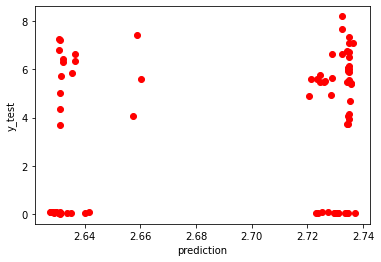

[67.2, 50.2, 35.6, 39.5, 70.5]
[67.2, 50.2, 35.6, 39.5, 70.5]
[54.4, 6.1, 42.7, 4.5, 5.7]
[54.4, 6.1, 42.7, 4.5, 5.7]
[67.2, 50.2, 35.6, 4.5, 5.7]
[67.2, 50.2, 35.6, 4.5, 5.7]
[[2.7387571]]
[[2.7387986]]
[[2.7388377]]
[[2.738875]]
[[2.7389104]]
[[2.7389438]]
[[2.7389755]]
[[2.7390056]]
[[2.7390342]]
[[2.739061]]
[[2.7390876]]
[[2.739112]]
[[2.7391348]]
[[2.7391567]]
[[2.7391772]]
[[2.7391968]]
[[2.7392154]]
[[2.739233]]
[[2.7392497]]
[[2.7392654]]
[[2.7392805]]
[[2.7392948]]
[[2.739308]]
[[2.739321]]
[[2.739333]]
[[2.7393444]]
[[2.7393553]]
[[2.7393656]]
[[2.7393754]]
[[2.7393847]]
[[2.7393935]]
[[2.7394018]]
[[2.7394097]]
[[2.739417]]
[[2.7394242]]
[[2.739431]]
[[2.7394373]]
[[2.7394433]]
[[2.739449]]
[[2.7394545]]
[[2.7394598]]
[[2.7394645]]
[[2.7394693]]
[[2.7394736]]
[[2.7394779]]
[[2.7394817]]
[[2.7394855]]
[[2.739489]]
[[2.7394924]]
[[2.7394955]]
[[2.7394986]]
[27.2, 50.6, 41.2, 2.9, 58.1]
Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 1s 35ms/step - loss: 28.4061 - mean_absolute_error: 4.4629 - val_loss: 23.8685 - val_mean_absolute_error: 3.8998
Epoch 2/500
7/7 [==============================] - 0s 7ms/step - loss: 27.9489 - mean_absolute_error: 4.4166 - val_loss: 23.4319 - val_mean_absolute_error: 3.8707
Epoch 3/500
7/7 [==============================] - 0s 7ms/step - loss: 27.4013 - mean_absolute_error: 4.3645 - val_loss: 22.8561 - val_mean_absolute_error: 3.8213
Epoch 4/500
7/7 [==============================] - 0s 10ms/step - loss: 26.6803 - mean_absolute_error: 4.2930 - val_loss: 22.0345 - val_mean_absolute_error: 3.7423
Epoch 5/500
7/7 [==============================] - 0s 8ms/step - loss: 25.7652 - mean_absolute_error: 4.1935 - val_loss: 20.7815 - val_mean_absolute_error: 3.6180
Epoch 6/500
7/7 [==============================] - 0s 9ms/step - loss: 24.1516 - mean_absolute_error: 4.0372 - val_loss: 19.0679 - val_mean_absolute_error: 3.4618
Epoch 7/500
7/7 [===============

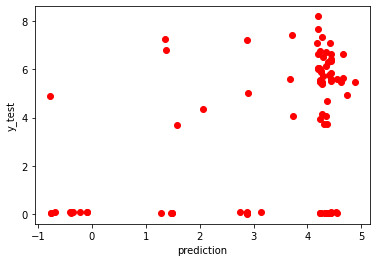

[29.2, 52.6, 43.2, 4.9, 60.1]
[29.2, 52.6, 43.2, 4.9, 60.1]
[68.1, 59.2, 10.5, 21.2, 66.4]
[68.1, 59.2, 10.5, 21.2, 66.4]
[29.2, 52.6, 43.2, 21.2, 66.4]
[29.2, 52.6, 43.2, 21.2, 66.4]
[[-0.7995436]]
[[-0.7995434]]
[[-0.79954326]]
[[-0.79954314]]
[[-0.7995429]]
[[-0.7995428]]
[[-0.79954267]]
[[-0.79954255]]
[[-0.7995423]]
[[-0.7995422]]
[[-0.79954195]]
[[-0.79954183]]
[[-0.7995417]]
[[-0.7995416]]
[[-0.7995415]]
[[-0.79954123]]
[[-0.7995411]]
[[-0.7995409]]
[[-0.79954076]]
[[-0.79954064]]
[[-0.7994399]]
[[-0.79943943]]
[[-0.7994417]]
[[-0.79944706]]
[[-0.79945445]]
[[-0.7994633]]
[[-0.7994726]]
[[-0.7994821]]
[[-0.7994915]]
[[-0.79950047]]
[[-0.7995086]]
[[-0.79951644]]
[[-0.7995236]]
[[-0.79953]]
[[-0.7995359]]
[[-0.7995411]]
[[-0.79954576]]
[[-0.79954994]]
[[-0.7995503]]
[[-0.7995541]]
[[-0.79955745]]
[[-0.7995603]]
[[-0.7995628]]
[[-0.7995651]]
[[-0.7995671]]
[[-0.7995688]]
[[-0.79957044]]
[[-0.7995719]]
[[-0.79957306]]
[[-0.799574]]
[[-0.799575]]
[35.4, 55.9, 1.4, 79.8, 47.7]
Epoch 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 1s 33ms/step - loss: 26.2677 - mean_absolute_error: 4.2043 - val_loss: 22.1422 - val_mean_absolute_error: 3.6406
Epoch 2/500
7/7 [==============================] - 0s 9ms/step - loss: 26.0121 - mean_absolute_error: 4.1750 - val_loss: 21.9351 - val_mean_absolute_error: 3.6093
Epoch 3/500
7/7 [==============================] - 0s 8ms/step - loss: 25.7046 - mean_absolute_error: 4.1410 - val_loss: 21.6933 - val_mean_absolute_error: 3.5713
Epoch 4/500
7/7 [==============================] - 0s 9ms/step - loss: 25.3753 - mean_absolute_error: 4.1051 - val_loss: 21.4168 - val_mean_absolute_error: 3.5478
Epoch 5/500
7/7 [==============================] - 0s 7ms/step - loss: 24.9963 - mean_absolute_error: 4.0714 - val_loss: 21.1252 - val_mean_absolute_error: 3.5271
Epoch 6/500
7/7 [==============================] - 0s 8ms/step - loss: 24.5166 - mean_absolute_error: 4.0286 - val_loss: 20.8045 - val_mean_absolute_error: 3.4986
Epoch 7/500
7/7 [================

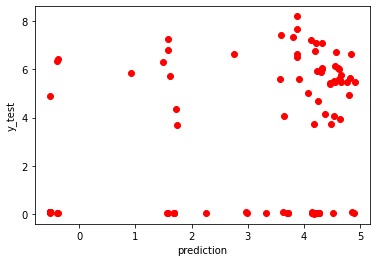

[37.4, 57.9, 3.4, 81.8, 49.7]
[37.4, 57.9, 3.4, 81.8, 49.7]
[43.5, 17.9, 14.5, 16.9, 36.5]
[43.5, 17.9, 14.5, 16.9, 36.5]
[37.4, 57.9, 3.4, 16.9, 36.5]
[37.4, 57.9, 3.4, 16.9, 36.5]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[[-0.51858485]]
[6

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 1s 31ms/step - loss: 22.7200 - mean_absolute_error: 3.7888 - val_loss: 19.0891 - val_mean_absolute_error: 3.2471
Epoch 2/500
7/7 [==============================] - 0s 11ms/step - loss: 22.5911 - mean_absolute_error: 3.7831 - val_loss: 18.9777 - val_mean_absolute_error: 3.2446
Epoch 3/500
7/7 [==============================] - 0s 10ms/step - loss: 22.4606 - mean_absolute_error: 3.7771 - val_loss: 18.8673 - val_mean_absolute_error: 3.2420
Epoch 4/500
7/7 [==============================] - 0s 9ms/step - loss: 22.3279 - mean_absolute_error: 3.7706 - val_loss: 18.7570 - val_mean_absolute_error: 3.2391
Epoch 5/500
7/7 [==============================] - 0s 10ms/step - loss: 22.1941 - mean_absolute_error: 3.7642 - val_loss: 18.6464 - val_mean_absolute_error: 3.2365
Epoch 6/500
7/7 [==============================] - 0s 8ms/step - loss: 22.0636 - mean_absolute_error: 3.7588 - val_loss: 18.5330 - val_mean_absolute_error: 3.2345
Epoch 7/500
7/7 [=============

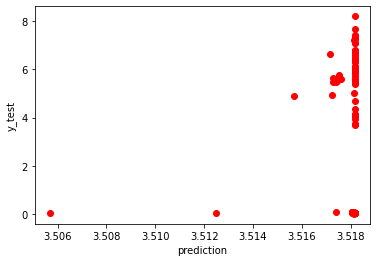

[67.2, 21.2, 49.2, 53.8, 48.8]
[67.2, 21.2, 49.2, 53.8, 48.8]
[30.8, 59.2, 19.7, 59.8, 79.1]
[30.8, 59.2, 19.7, 59.8, 79.1]
[67.2, 21.2, 49.2, 59.8, 79.1]
[67.2, 21.2, 49.2, 59.8, 79.1]
[[3.5181394]]
[[3.5181456]]
[[3.5181499]]
[[3.5181532]]
[[3.5181556]]
[[3.518157]]
[[3.518158]]
[[3.518159]]
[[3.5181594]]
[[3.5181599]]
[[3.5181603]]
[[3.5181603]]
[[3.5181603]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[[3.5181608]]
[39.3, 76.3, 77.5, 57.4, 28.1]
Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 1s 31ms/step - loss: 15.7520 - mean_absolute_error: 3.1598 - val_loss: 29.2047 - val_mean_absolute_error: 3.2113
Epoch 2/500
7/7 [==============================] - 0s 8ms/step - loss: 12.8310 - mean_absolute_error: 3.1775 - val_loss: 28.5918 - val_mean_absolute_error: 3.2575
Epoch 3/500
7/7 [==============================] - 0s 7ms/step - loss: 11.6773 - mean_absolute_error: 3.0056 - val_loss: 28.2937 - val_mean_absolute_error: 3.1824
Epoch 4/500
7/7 [==============================] - 0s 8ms/step - loss: 11.6056 - mean_absolute_error: 2.9173 - val_loss: 28.0557 - val_mean_absolute_error: 3.1823
Epoch 5/500
7/7 [==============================] - 0s 10ms/step - loss: 11.3120 - mean_absolute_error: 2.9427 - val_loss: 26.6521 - val_mean_absolute_error: 3.1686
Epoch 6/500
7/7 [==============================] - 0s 10ms/step - loss: 11.0956 - mean_absolute_error: 2.9729 - val_loss: 26.1041 - val_mean_absolute_error: 3.1633
Epoch 7/500
7/7 [==============

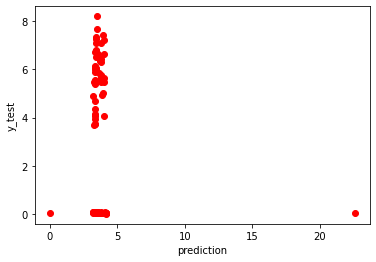

[41.3, 78.3, 79.5, 59.4, 30.1]
[41.3, 78.3, 79.5, 59.4, 30.1]
[64.4, 69.2, 3.9, 19.9, 58.1]
[64.4, 69.2, 3.9, 19.9, 58.1]
[41.3, 78.3, 79.5, 19.9, 58.1]
[41.3, 78.3, 79.5, 19.9, 58.1]
[[1.0755643]]
[[1.1689339]]
[[1.2623087]]
[[1.355692]]
[[1.4490767]]
[[1.5424694]]
[[1.6358657]]
[[1.7292699]]
[[1.8226701]]
[[1.9160676]]
[[2.0094573]]
[[2.1028624]]
[[2.1962597]]
[[2.2896676]]
[[2.383069]]
[[2.4764698]]
[[2.5698712]]


In [ ]:
ans_num = 5
num = 50
ans_list = []
while (len(ans_list) < ans_num ):
  chromosome_list = make_parent(5, 0, 80)
  chromosome_list2 = make_parent(5, 0, 80)
  print(chromosome_list)
  node_list = [4,3,2,1]
  model = make_model(node_list, 5)
  model1, rmse = train_model(model, x_train, y_train, x_test, y_test, 50, 500, 20)
  last_chromosome_list = generate_child(model1, chromosome_list, 3)
  last_chromosome_list2 = generate_child(model1, chromosome_list2, 3)

  print(chromosome_list)
  print(last_chromosome_list)

  print(chromosome_list2)
  print(last_chromosome_list2)

  p3 = selection(last_chromosome_list, last_chromosome_list2)
  print(p3)
  p3 = muatation(p3)
  print(p3)
  ans = replacement(p3, model1)

  for i in range(0, num):
      generate_child(model1, p3, 10)
      p3 = muatation(p3)
      ans,p33 = replacement(p3, model1)
  if ans == 1 :
    ans_list.append(p33)

In [ ]:
p = model1.predict([[66.5, 45.6, 56.9, 107.4, 66.9]])
print(p)

[[5.015289]]
